# Importing the packages

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import trim_mean, iqr, t
from sklearn.preprocessing import PolynomialFeatures
import random
from tabulate import tabulate
from scipy.stats import norm
from scipy.stats.distributions import norm as distribution_norm

In [320]:
random.seed(1854536)
np.random.seed(1854536)

# Question 1: Exploratory data analysis
#### (a) Construct a histogram and a boxplot of the wavelength, and comment on the plots.

In [321]:
df = pd.read_csv('cbl20.csv')
x = np.array(df['X'])
y = np.array(df['Y'])

df.columns = ['Time', 'Wavelength']

Text(0.5, 1.0, 'Histogram for Wavelength data')

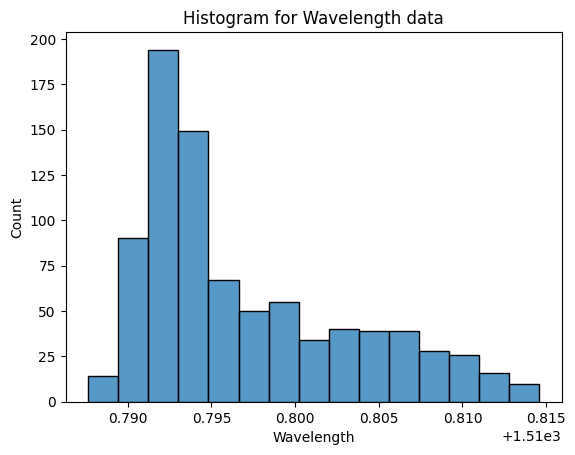

In [322]:
sns.histplot(data=df, x='Wavelength')
plt.title('Histogram for Wavelength data')

<span style="color:green">The histogram show that the wavelength data has positive skew.</span>

Text(0.5, 1.0, 'Boxplot for Wavelength data')

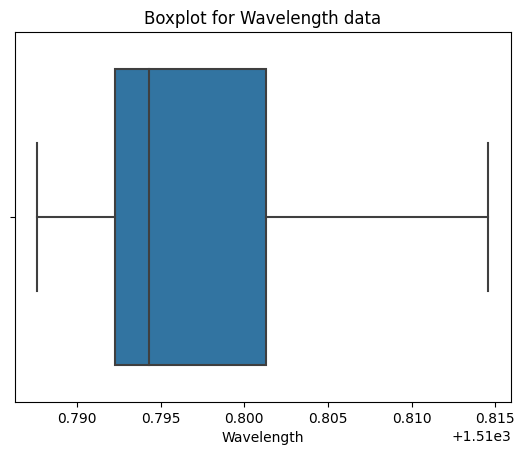

In [323]:
sns.boxplot(data=df, x='Wavelength')
plt.title('Boxplot for Wavelength data')

<span style="color:green">The box plot shows that the outliers furthest from the median are above the median.</span>

#### (b) Compute the mean, 10% trimmed mean, median, standard deviation, and interquar-tile range of the wavelength and present these in a table. Which of these measurements would you use to best describe the data? Justify your answer.

In [324]:
mean = np.mean(y)
trimmed_mean = trim_mean(y, proportiontocut=0.1)
median = np.median(y)
std = np.std(y)
IQR = iqr(y)

table = [['Mean', mean],
         ['Trimmed Mean', trimmed_mean],
         ['Median', median],
         ['Standard Deviation', std],
         ['IQR', IQR],]

col_names = ['Statistic', 'Value']

print(tabulate(table, headers=col_names, floatfmt=".6f"))

Statistic                 Value
------------------  -----------
Mean                1510.797057
Trimmed Mean        1510.796291
Median              1510.794313
Standard Deviation     0.006283
IQR                    0.009010


<span style="color:green">The median is used to describe the centre of the data as it is not impacted by the outliers. The mean is not used as it is impacted by the outliers and will be higher than the true centre of the data. The IQR is used to describe the dispersion of data as this does not rely on the mean for its calculation.</span>

#### (c) Construct a scatterplot of wavelength versus time index.

Text(0, 0.5, 'Wavelength')

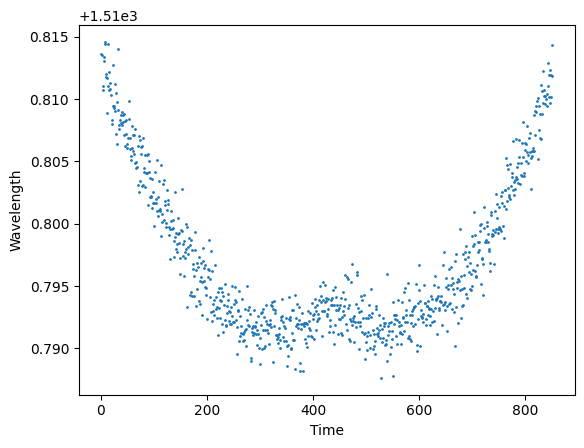

In [325]:
plt.scatter(x, y, s=1)
plt.xlabel('Time')
plt.ylabel('Wavelength')

# plt.title('Scatter plot of Wavelength against Time')

# Question 2. Modelling
#### (a) Fit a simple linear regression model for wavelength versus time index. Plot the linear fit on your scatterplot in question 1(c). Comment on the appropriateness of this model for your data.

In [326]:
def get_normalized_design_matrix(x, degree):
    trans = PolynomialFeatures(degree=degree)
    X = trans.fit_transform(x.reshape(-1, 1))
    X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
    return X

In [327]:
def predict(model_params, x):
    return np.matmul(np.transpose(model_params), x)

In [328]:
def fit_model_and_predict(x, y, degree, AIC_values=None, return_model=False):
    X = get_normalized_design_matrix(x, degree)
    model = sm.OLS(y, X).fit()
    y_predict = [predict(np.array(model.params), X[i]) for i in range(len(y))]
    if AIC_values != None:
        AIC_values.append(model.aic)
    if return_model:
        return y_predict, model
    else:
        return y_predict

In [329]:
def plot_scatter_and_polynomial_best_fit_line(x, y, degree):
    plt.scatter(x, y, s=1)
    y_predict = fit_model_and_predict(x, y, degree)
    plt.plot(x, y_predict, c='orange')
    plt.xlabel('Time')
    plt.ylabel('Wavelength')
    # plt.title(f'Data with polynomial LOBF of degree {degree}')

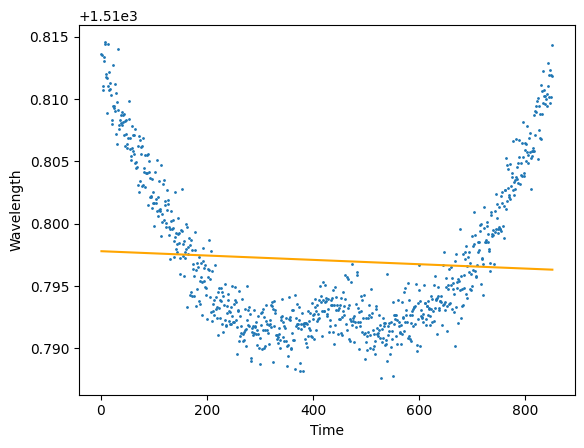

In [330]:
plot_scatter_and_polynomial_best_fit_line(x, y, 1)

<span style="color:green">A linear fit is not appropriate since there are large residuals between the LOBF and the most of the true data.</span>

#### (b) An assumption of linear regression is that the response is linear in the parameters. Therefore the response can be modelled as a linear function of polynomials in the predictor variable. Fit a model for wavelength including both a linear and a quadratic term in ‘X’, and plot the resulting quadratic fit on your scatterplot (from part 1(c)).

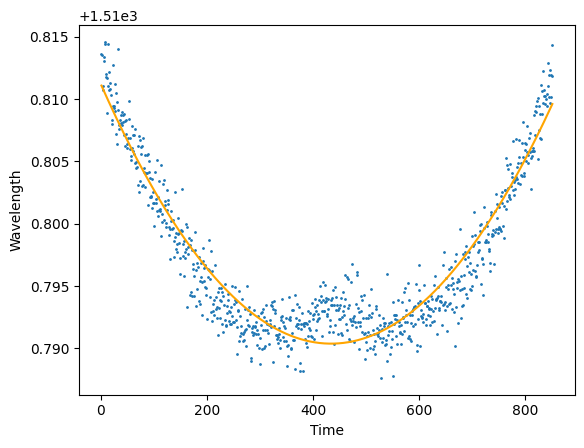

In [331]:
plot_scatter_and_polynomial_best_fit_line(x, y, 2)

#### (c) You can now proceed to fit higher order polynomials, plotting the model fit on the question 1(c) scatterplot in each case. Note that a polynomial model of order k should include all lower terms. In polynomial regression you can avoid some numerical problems if you use the standardised ‘X’ variable. Standardise ’X’ by subtracting the sample mean of ‘X’ and dividing by the sample standard deviation of ‘X’. Can you explain why it is better to use the standardised ‘X’ variable in polynomial regression models? Continue fitting higher order polynomials for as long as you judge to be reasonable (the next question should help you judge).

<span style="color:green">Introducing polynomial terms means that the inputs to the model are highly correlated, e.g. x^5 is highly correlated with x^7. It is therefore hard to distinguish the effect of x^5 on y from the effect of x^7 on y. The coefficients of these variables will then be imprecise. This problem is called multicollinearity and is solved by standardizing the inputs. </span>

Text(0.5, 1.0, 'Data with polynomial LOBF of even degrees')

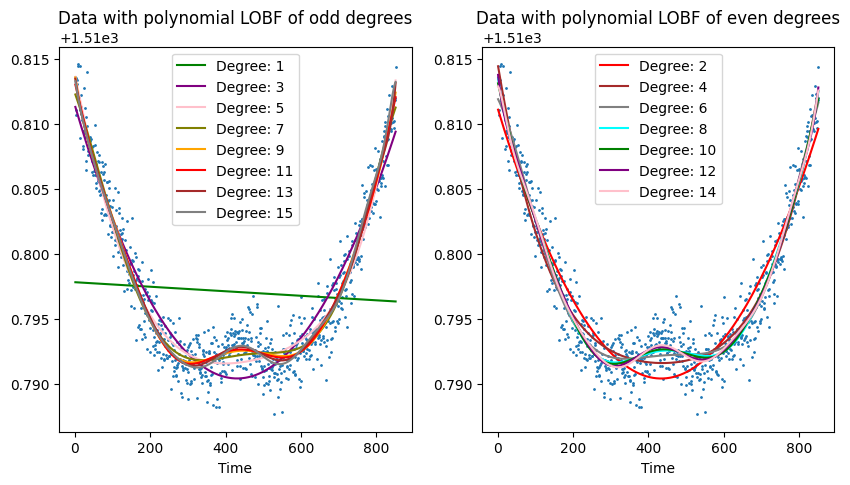

In [375]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

colours = ['orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
colours = colours + colours

for ax in axs:
    ax.scatter(x, y, s=1)
    ax.set_xlabel('Time')

AIC_values = []

for i in range(1, 22):
    y_predict = fit_model_and_predict(x, y, i, AIC_values=AIC_values)
    
    if i % 2 != 0 and i < 16:
        axs[0].plot(x, y_predict, label=f'Degree: {i}', c=colours[i % 16])
    if i % 2 == 0 and i < 16:
        axs[1].plot(x, y_predict, label=f'Degree: {i}', c=colours[i % 16])

for ax in axs:
    ax.legend(loc="upper center")

axs[0].set_title('Data with polynomial LOBF of odd degrees')
axs[1].set_title('Data with polynomial LOBF of even degrees')

#### (d) Model comparison may be made by Akaike’s Information Criterion (AIC). Briefly explain what the AIC tells you, and how it can be used to select between models. Assuming the errors are normally distributed in order to calculate the log-likelihood, produce a table of AIC for each model you have fitted. Which model do you select? Justify your answer

<span style="color:green">Akaike’s Information Criterion (AIC) is calculated using:
- 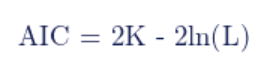

<span style="color:green"> 
- Where K is the number of independent variables and ln(L) is the maximum log likelihood estimate of the model. ln(L) defines the probability that the data observed matches the model's predicted output. Therefore, a model with the lowest AIC will be highly reproducible while using a small number of independent variables.</span>

Text(0.5, 1.0, 'How AIC values vary with the degree of polynomial in the model')

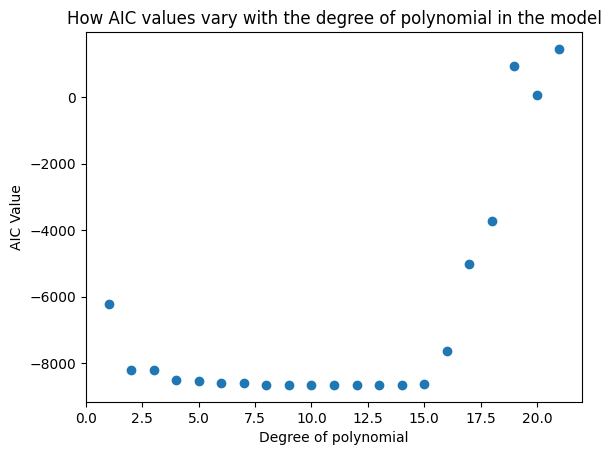

In [333]:
plt.scatter([i for i in range(1, len(AIC_values)+1)], AIC_values)
plt.xlabel('Degree of polynomial')
plt.ylabel('AIC Value')
plt.title('How AIC values vary with the degree of polynomial in the model')

In [383]:
table = [[i+1, AIC_values[i]] for i in range(len(AIC_values))]

col_names = ['Degree of Polynomial LOBF', 'AIC Value']

print(tabulate(table, headers=col_names))

print(f'\nTherefore, the degree of polynomial with the smallest AIC value is {AIC_values.index(min(AIC_values)) + 1}.')

  Degree of Polynomial LOBF    AIC Value
---------------------------  -----------
                          1   -6214.01
                          2   -8211.28
                          3   -8210.77
                          4   -8509.75
                          5   -8528.08
                          6   -8609.74
                          7   -8611.18
                          8   -8645.55
                          9   -8643.68
                         10   -8645.94
                         11   -8644.12
                         12   -8652.63
                         13   -8652.17
                         14   -8656.11
                         15   -8635.14
                         16   -7634.85
                         17   -5034.06
                         18   -3731.85
                         19     923.21
                         20      59.8632
                         21    1447.13

Therefore, the degree of polynomial with the smallest AIC value is 14.


In [384]:
CHOSEN_DEGREE = 14

#### (e) For your chosen model from question 2(c), calculate the residuals and construct plots of the residuals to check your model assumptions. State clearly which assumptions you are checking with each plot, and your conclusion 

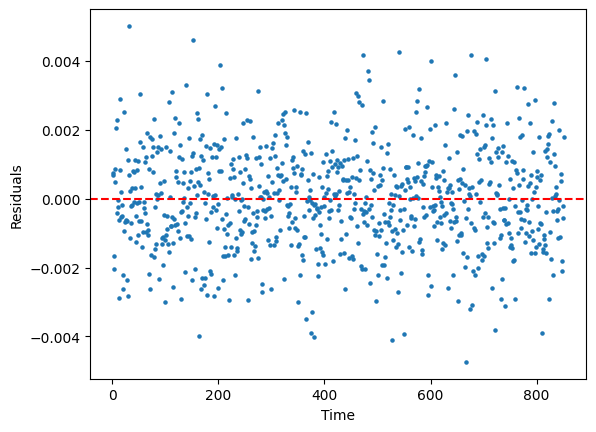

In [335]:
y_predict, model = fit_model_and_predict(x, y, CHOSEN_DEGREE, return_model=True)

plt.scatter(x, model.resid, s=5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals of Wavelength')
plt.title('')
plt.show()

In [415]:
standard_deviation = np.std(model.resid)
mean = np.mean(model.resid)
normalized_residuals = np.array([(i - mean) / standard_deviation for i in model.resid])

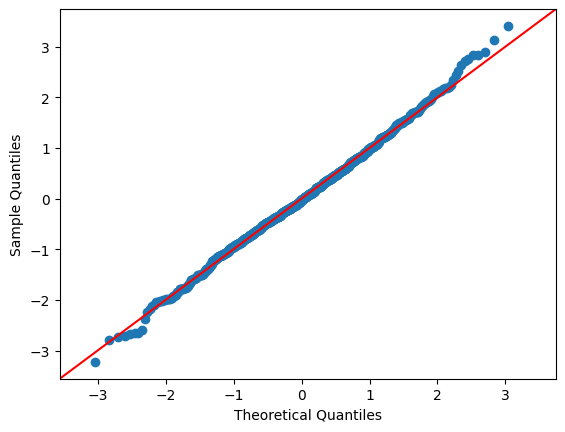

In [418]:
fig = sm.qqplot(data=normalized_residuals, line='45', dist=distribution_norm)

<span style="color:green">This is a plot of the quantile values of the normalized residuals against those of a standard normal distribution. A red line at 45 degrees that passes through the origin is also plotted. Since the majority of points are close to this red line, this indicates that the normalized residuals can be approximated as being from a standard normal distribution. It is only when the normalized residuals are very low (near -3) or very high (near +3) that the quantile values stray below above the red line respectively.

#### (f) Now suppose you have only been given the responses for time indices equal to 10,20,30,...,850. Write code to extract the relevant sample from your data set, and fit the same model you chose in question 2(c) to the sample (i.e. if you chose a linear model in question 2(c), fit a linear model in the sample). Make a scatterplot including the model fit in the sample

In [337]:
x_reduced = x[9:-1:10]
y_reduced = y[9:-1:10]

In [338]:
def calc_corrected_error_variance(y, y_predict):
    n = len(y)
    return np.sqrt(1 / (n - 2) * np.sum([(y[i] - y_predict[i]) ** 2 for i in range(n)]))

Text(0.5, 1.0, 'Reduced data and polynomial LOBF of degree 14')

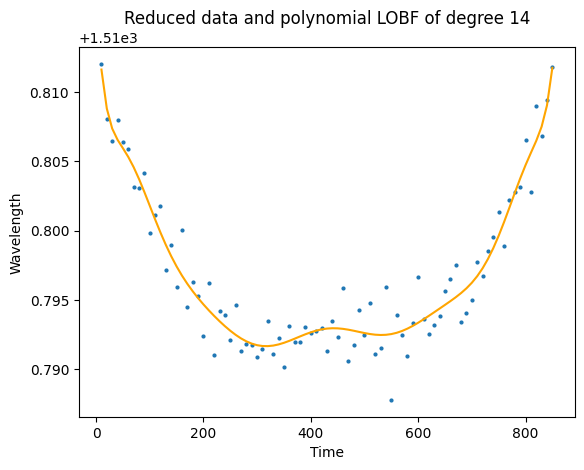

In [339]:
plt.scatter(x_reduced, y_reduced, s=4)
y_reduced_predict = fit_model_and_predict(x_reduced, y_reduced, CHOSEN_DEGREE)
plt.plot(x_reduced, y_reduced_predict, c='orange')

plt.xlabel('Time')
plt.ylabel('Wavelength')
plt.title('Reduced data and polynomial LOBF of degree 14')

# Question 3: Bootstrapping
#### (a) Using the sample from question 2(f), you are asked to calculate a 95% pointwise confidence band for the expected wavelength as a function of time index. It is pointwise as the band is constructed from a set of confidence intervals, one at each point (value of ‘X’). You decide to bootstrap.

#### Calculate the residuals.

### Then code the following algorithm: 
- Resample from the vector of residuals with replacement, to get a boostrapped sample. 
- Calculate a new response variable.
- Fit a polynomial regression model (same order as in question 2(f)) for the new response values y∗i – note the predictor variables are the same as in question 2(f). 
- Save the predicted values from the polynomial regression model. Repeat this many times, then calculate across all repetitions the 0.025 and 0.975 quantiles of the predicted frequencies for each value of ‘X’ – these are the upper and lower limits of the confidence intervals at each time point, which may be joined together to form a 95% confidence band. Add the bootstrapped 95% confidence band 4


In [340]:
def calculate_bootstrap_confidence_levels(x, y, n_samples):
    y_predict = fit_model_and_predict(x, y, CHOSEN_DEGREE)
    n = len(x)

    residuals = [y[i] - y_predict[i] for i in range(len(y))]

    samples = []
    for i in range(n_samples):
        sample_residual = np.random.choice(residuals, n, replace=True) # Resampling from vector of residuals
        y_sample = y_predict + sample_residual # Calculating new response variable
        y_predict_from_sample = fit_model_and_predict(x, y_sample, CHOSEN_DEGREE) # Fitting regression model
        samples.append(y_predict_from_sample)

    samples = np.array(samples)

    lower_bound_bootstrap = []
    upper_bound_bootstrap = []

    for i in range(n):
        samples_at_time_step = samples[:, i]
        two_point_five_percent_quantile_value = np.quantile(samples_at_time_step, 0.025)
        ninety_seven_point_five_percent_quantile_value = np.quantile(samples_at_time_step, 0.975)
        lower_bound_bootstrap.append(two_point_five_percent_quantile_value)
        upper_bound_bootstrap.append(ninety_seven_point_five_percent_quantile_value)

    return lower_bound_bootstrap, upper_bound_bootstrap
    

In [341]:
def calculate_actual_confidence_levels(x, y, n_samples):
    y_predict = fit_model_and_predict(x, y, CHOSEN_DEGREE)

    sigma = calc_corrected_error_variance(y, y_predict)

    t_score = t.ppf(0.975, n_samples - 1)

    lower_band_actual = y_reduced_predict - sigma * t_score
    upper_band_actual = y_reduced_predict + sigma * t_score

    return lower_band_actual, upper_band_actual

In [342]:
def plot_confidence_bands(x, y, n_samples, lower_bound, upper_bound, actual_lower_bound, actual_upper_bound):

    y_predict = fit_model_and_predict(x, y, CHOSEN_DEGREE)
    
    plt.plot(x, upper_bound, c='green', label=f'Upper band from bootstrapping')
    plt.plot(x, lower_bound, c='red', label='Lower band from bootstrapping')
    plt.plot(x, y_predict, c='orange', label='LOBF Degree 14')

    plt.plot(x, actual_upper_bound, c='purple', label='Actual upper band')
    plt.plot(x, actual_lower_bound, c='yellow', label='Actual lower band')

    plt.scatter(x, y, s=4)
    plt.legend()

    plt.xlabel('Time')
    plt.ylabel('Wavelength')
    plt.title(f'95% confidence band for polynomial LOBF of degree 14 \n NOTE: Bootstrapping is with {n_samples} samples')

In [343]:
def calc_confidence_bands_and_plot_them(x, y, n_samples):
    lower_bound_bootstrap, upper_bound_bootstrap = calculate_bootstrap_confidence_levels(x_reduced, y_reduced, n_samples)
    lower_band_actual, upper_band_actual = calculate_actual_confidence_levels(x_reduced, y_reduced, n_samples)

    plot_confidence_bands(x, y, n_samples, lower_bound_bootstrap, upper_bound_bootstrap, lower_band_actual, upper_band_actual)

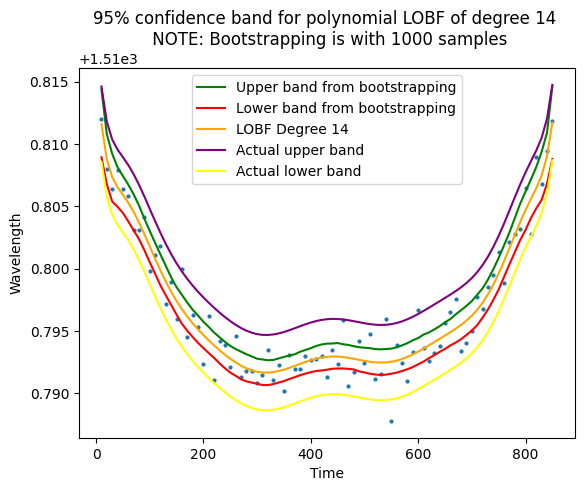

In [344]:
calc_confidence_bands_and_plot_them(x_reduced, y_reduced, 1000)

#### (b) Show graphically that as the number of bootstrapped samples increases, the bootstrapped confidence band converges to the actual confidence band

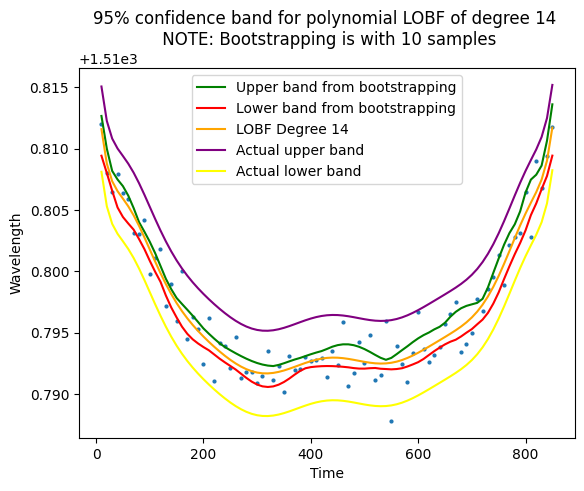

In [345]:
calc_confidence_bands_and_plot_them(x_reduced, y_reduced, 10)

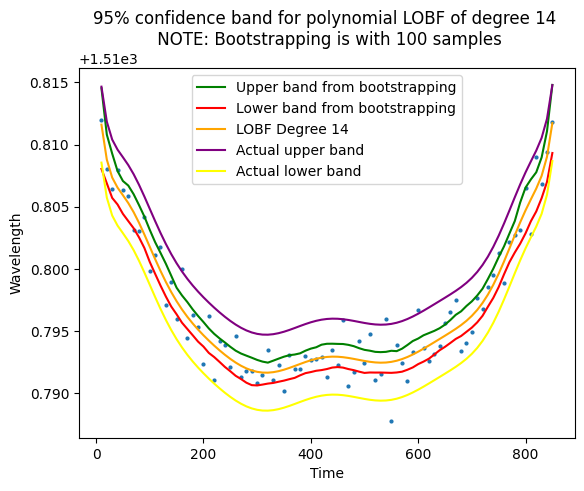

In [346]:
calc_confidence_bands_and_plot_them(x_reduced, y_reduced, 100)

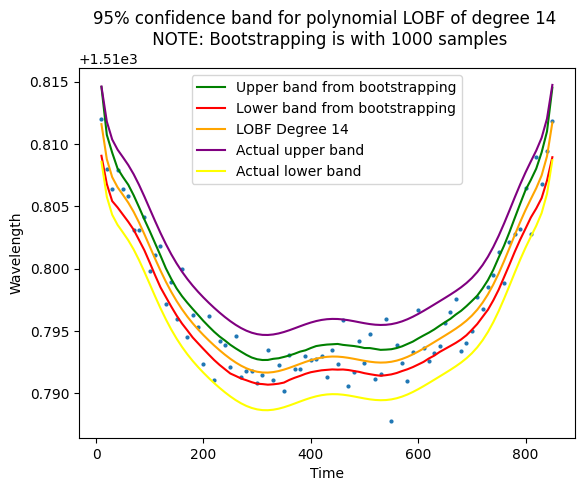

In [347]:
calc_confidence_bands_and_plot_them(x_reduced, y_reduced, 1000)

### Observations from above plots
- The above 3 plots show that as the number of bootstrap samples are increased, the upper and lower bounds of the bootstrap confidence band change to have the same shape as the line of best fit. Increasing the number of samples further does not change these bands significantly.
- The bootstrap confidence band is much narrower than the actual confidence band. 
- The bootstrap 95% confidence band does not accurately represent the reduced data since more than 5% of the data points fall outside this band. Future work would involve trying to determine why this is the case.
- The actual confidence band more accurately represents the reduced data since (4 / 85) * 100 ~ 5% of the data points fall outside this band.